![WordCloud](./img/wordcloud.png)

# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung f√ºr eine erfolgreiche Mensch-Maschine-Kommunikation. Zus√§tzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterst√ºtzen. Handelt es sich bei diesem Kommentar um unerw√ºnschte Inhalte, verbreitet dieser Beitrag Falschinformationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

Im folgenden Lernmodul sollen mithilfe computergest√ºtzter Methoden eine Antwort auf solche Problemstellungen gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) √ºber die verf√ºgbaren Daten (hier: Textbeitr√§ge) treffen kann, m√ºssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und unterst√ºtzenden Bibliotheken durch.

**√úbersicht √ºber die Lerninhalte:**

1. [Einf√ºhrung](#einf√ºhrung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
        1. [Zeichen bereinigen](#zeichen-bereinigen)
        2. [W√∂rter bereinigen](#w√∂rter-bereinigen)
        3. [Tweets bereinigen](#tweets-bereinigen)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
        1. [Vokabular](#vokabular)
        2. [Label](#label)
        3. [Vektorisierung](#vectorization)
        4. [Features](#features)
    2. [Textdaten klassifizieren](#klassifizieren)
        1. [√úberwachte Klassifikation](#√ºberwachte-klassifikation)
        2. [Un√ºberwachte Klassifikation](#un√ºberwachte-klassifikation)
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt f√ºr Schritt in kontextbezogene Daten f√ºr eine Textanalyse zu transformieren. Dies geschieht in der Datendom√§ne. Daraufhin bewegen sich die Teilnehmer in der Modelldom√§ne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup f√ºr die Aufgaben√ºberpr√ºfung:**

In [1]:
from taskreview.learningModule import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einf√ºhrung'>Einf√ºhrung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit √§hnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, w√§hrend der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, l√§sst sich das Forschungsfeld des _NLP_ auf √§hnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgef√ºhrt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle √úbersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul besch√§ftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben k√∂nnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden m√ºssen. Aber auch ein aktuelles Stimmungsbild der Gesellschaft kann in Krisenzeiten √ºber k√ºrzlich verfasste Beitr√§ge auf Twitter geschaffen werden.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) f√ºr numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert ben√∂tigte Abh√§ngigkeiten:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Au√üerdem werden die folgenden Systemkomponenten zur Hife genommen:

In [3]:
import glob

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendom√§ne beschaffen wir uns zun√§chst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verk√∂rpert, der in unserem Fall bspw. ein Text sein kann. Im weiteren Verlauf werden die beschafften Daten begutachtet und auf Basis dessen bereinigt.

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

twitter = pd.DataFrame()Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Und genau von dort stammt das ZIP-Archiv `tweets.json.zip`, welches wir im folgenden mithilfe von Pandas einlesen und im DataFrame `twitter` hinterlegen.

In [4]:
twitter = None # Fresh start

In [5]:
for file in glob.glob('./data/tweets/*.gz'):
    json = pd.read_json(file, compression='gzip')
    twitter = pd.concat([twitter, json[:5000]])

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, l√§sst sich √ºber die `head()` Funktionalit√§t der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [6]:
twitter.head()

twista   type                   id          user  \
0  0.3.4b1  reply  1245112617968033792  3.792278e+09   
1  0.3.4b1  reply  1245112620740296704  1.181766e+18   
2  0.3.4b1  reply  1245112625412923392  1.189159e+18   
3  0.3.4b1  reply  1245081023324528640  4.766604e+07   
4  0.3.4b1  reply  1245112639988076544  2.809609e+09   

                 created_at                      recorded_at  \
0 2020-03-31 22:15:55+00:00 2020-03-31 22:16:09.670982+00:00   
1 2020-03-31 22:15:56+00:00 2020-03-31 22:16:09.673858+00:00   
2 2020-03-31 22:15:57+00:00 2020-03-31 22:16:09.684859+00:00   
3 2020-03-31 20:10:23+00:00 2020-04-01 08:15:03.535422+00:00   
4 2020-03-31 22:16:01+00:00 2020-03-31 22:16:09.692649+00:00   

                                              source  retweets  favourites  \
0  <a href="https://mobile.twitter.com" rel="nofo...       0.0           0   
1  <a href="http://twitter.com/download/android" ...       0.0           0   
2  <a href="http://twitter.com/download/android" ...       0.0           0   
3  <a href="http://twitter.com/download/iphone" r...       7.0          65   
4  <a href="https://mobile.twitter.com" rel="nofo...       0.0           0   

  lang  ... name screen_name location description  url  verified followers  \
0   de  ...  NaN         NaN      NaN         NaN  NaN       NaN       NaN   
1   de  ...  NaN         NaN      NaN         NaN  NaN       NaN       NaN   
2   de  ...  NaN         NaN      NaN         NaN  NaN       NaN       NaN   
3   de  ...  NaN         NaN      NaN         NaN  NaN       NaN       NaN   
4   de  ...  NaN         NaN      NaN         NaN  NaN       NaN       NaN   

  friends listed statuses  
0     NaN    NaN      NaN  
1     NaN    NaN      NaN  
2     NaN    NaN      NaN  
3     NaN    NaN      NaN  
4     NaN    NaN      NaN  

[5 rows x 26 columns]

Leider liefert die `head()` Funktionalit√§t nicht die Gr√∂√üe des Datensatzes zur√ºck. Wie viele Beispiele sind in ihm enthalten?

In [7]:
texte_lm.show_task(1)

In [8]:
twitter.shape[0]

10000

Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der Datensatz?

In [9]:
texte_lm.show_task(2)

In [10]:
twitter.shape[1]

26

Mal sehen, wie die Merkmale hei√üen.

In [11]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'refers_to', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses'],
      dtype='object')

Das Merkmal _lang_ schauen wir uns als Erstes an. Welche Sprachen sind vertreten?

In [12]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'es', 'tr', 'und', 'fr', 'tl', 'et', 'it', 'ko',
       'in'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [13]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gew√ºnschten Tweets zu enthalten. Wir extrahieren dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [14]:
tweets = twitter['text']
tweets.head()

0    @artelle22 Diese N√§chte, wo man bis um 2 Uhr m...
1                           @astefanibays abner e sthe
2                   @durstige_waemby War sch√∂n mit dir
3     niemand hat a ahnung, aber jeder wei√ü es besser.
4                          @xXskiller20Xx Z u  s p √§ t
Name: text, dtype: object

Beim Extrahieren des Tweets werden ausnahmslos alle Beispiele √ºberf√ºhrt. Sind unsere Daten nun vollst√§ndig, oder gibt es wom√∂glich inhaltslose Tweets ohne Textinhalt, die uns in der folgenden Aufbereitung Probleme bereiten?

In [15]:
texte_lm.show_task(3)

In [16]:
tweets.isna().unique()

array([False,  True])

Wenn ja, bitte bereinigen...

In [17]:
tweets = tweets.dropna()

In [18]:
tweets_copy = tweets

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

#### 2.3.1 <a id='zeichen-bereinigen'>Zeichen bereinigen</a>

Schauen wir uns das erste Beispiel an. Mit welchem Befehl kommen wir zum ersten Tweet?

In [19]:
texte_lm.show_task(4)

In [20]:
tweets.iloc[0]

'@artelle22 Diese N√§chte, wo man bis um 2 Uhr morgens im Bett liegt und √ºber das Leben nachdenkt.'

Leider enthalten Tweets allerhand Sonderzeichen, Emojis und vielleicht sogar eine URL. 

Daher werden wir als n√§chstes alle Symbole entfernen, die weder dem Alphabet angeh√∂ren, noch Ziffern sind. Welcher regul√§re Ausdruck kommt daf√ºr in Frage?

In [21]:
texte_lm.show_task(5)

In [22]:
expression = '[^a-zA-Z√§√∂√º√ü√Ñ√ñU\s]'
tweets = tweets.replace(regex={expression : ''})
tweets.iloc[0]

'artelle Diese N√§chte wo man bis um  Uhr morgens im Bett liegt und √ºber das Leben nachdenkt'

Die folgenden regul√§ren Ausdr√ºcke entfernen zus√§tzlich alle URLs und Zeilenumbr√ºche.

In [23]:
tweets = tweets.replace(regex={r'http\S+' : '', r'\n' :  ' '})
tweets.iloc[0]

'artelle Diese N√§chte wo man bis um  Uhr morgens im Bett liegt und √ºber das Leben nachdenkt'

#### 2.3.2 <a id='w√∂rter-bereinigen'>W√∂rter bereinigen</a>

Da unsere Bereinigung im vorherigen Abschnitt nur noch einzelne W√∂rter und keine Symbole mehr √ºbrig gelassen hat, werden wir jeden Tweet in seine Bestandteile zerlegen. Daf√ºr zerteilen wir die Zeichenkette anhand des Leerzeichens und erhalten eine Liste von W√∂rtern pro Tweet. Dieser Schritt wird als Tokenisierung bezeichnet.

In [24]:
tweets = tweets.str.split()
tweets.iloc[0]

['artelle',
 'Diese',
 'N√§chte',
 'wo',
 'man',
 'bis',
 'um',
 'Uhr',
 'morgens',
 'im',
 'Bett',
 'liegt',
 'und',
 '√ºber',
 'das',
 'Leben',
 'nachdenkt']

Nun da wir die einzelnen W√∂rter getrennt haben, fassen wir alle W√∂rter aus jedem Tweet zu einer gro√üen Sammlung zusammen.

In [25]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word.lower())
    return all_words

Wie viele unterschiedliche W√∂rter sind getweetet worden?

In [26]:
texte_lm.show_task(6)

In [27]:
all_words = aggregate_words(tweets)
len(pd.Series(all_words).unique())

21268

Nachdem wir alle W√∂rter beisammen haben, interessieren uns die beliebtesten W√∂rter. An dieser Stelle greifen wir zum ersten mal auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zur√ºck, welches eine H√§ufigkeitsverteilung √ºber die [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) Funktionalit√§t wie folgt implementiert.

In [28]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

Wie lauten also die drei h√§ufigsten W√∂rter

In [29]:
texte_lm.show_task(7)

In [30]:
fd.most_common(3)

[('die', 1559), ('und', 1386), ('ich', 1254)]

Es ist nachzuvollziehen, wieso Artikel die am h√§ufigsten verwendeten W√∂rter sind. Schauen wir uns die H√§ufigkeitsverteilung der 15 beliebtesten W√∂rter an.

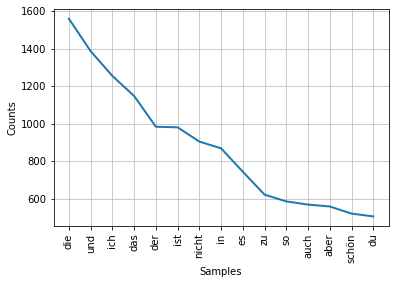

In [31]:
fd.plot(15)

F√ºr unsere Stimmungsanalyse scheinen Artikel und Pronomen leider nicht hilfreich zu sein. Daher wollen wir sie als kontextlose W√∂rter entfernen. Diese werden auch als Stoppw√∂rter, also W√∂rter, die den Lesefluss st√∂ren, bezeichnet. 

Wir √ºberf√ºhren die in `stop_words.txt` enthaltenen Stoppw√∂rter in eine List namens `stop_words`.

In [32]:
stop_words = pd.read_csv('./data/vocab/stop_words.txt', names=['Wort'])
stop_words.head()

Wort
0   der
1   die
2   das
3   ein
4  eine

Wie viel Prozent unseres Datensatzes w√ºrden wir wohl verlieren, wenn wir die Stopp-W√∂rter entfernen?

In [33]:
def content_loss(text):
    content = [word for word in text if word not in stop_words['Wort'].values.tolist()]
    return 1.0 - len(content) / len(text)

In [34]:
content_loss(all_words)

0.1650552733791455

Dann werfen wir den Filter mal an.

In [35]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    for row in tweets:
        token_list = []
        for token in row:
            if token.lower() not in stop_words['Wort'].values.tolist():
                token_list.append(token.lower())
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [36]:
tweets = filter_tokens(tweets) # Python list
tweets.head()

0    [artelle, diese, n√§chte, wo, man, bis, um, uhr...
1                       [astefanibays, abner, e, sthe]
2               [durstigewaemby, war, sch√∂n, mit, dir]
3       [niemand, hat, a, ahnung, jeder, wei√ü, besser]
4                      [xxskillerxx, z, u, s, p, √§, t]
dtype: object

Damit muss unsere Sammlung von W√∂rtern aktualisiert werden. Der Einfachheit halber sammeln wir sie erneut √ºber die `aggregate_words()` Funktion.

In [37]:
all_words = aggregate_words(tweets)

Welche Ausgabe kann bei erneutem Aufruf der `content_loss()` Funktion erwartet werden?

In [38]:
texte_lm.show_task(8)

In [39]:
content_loss(all_words)

0.0

Wie sehen jetzt wo keine Stoppw√∂rter mehr enthalten sind die h√§ufigsten W√∂rter aus? Alternativ zur bereits bekannten H√§ufigkeitsverteilung lassen sich Schlagwortwolken aus den W√∂rtern erstellen. Dazu nutzen wir die [WordCloud](http://amueller.github.io/word_cloud/index.html) Funktionalit√§t wie folgt.

In [40]:
from wordcloud import WordCloud
wc = WordCloud()

In [41]:
plt.imshow(wc.generate_from_frequencies(FreqDist(all_words)), interpolation="bilinear")
plt.title('Die h√§ufigsten W√∂rter')
plt.show()

#### 2.3.3 <a id='tweets-bereinigen'>Tweets bereinigen</a>

Da uns der vergangene Abschnitt einige W√∂rter gekostet hat, wollen wir nun die Tweets identifizieren, die zu wenig oder vielleicht sogar zu viele W√∂rter enthalten. Beide Extrema sind f√ºr die weiterf√ºhrende Analyse nicht zu gebrauchen. Daher berechnen wir im folgenden die L√§nge eines Tweets. Wie viele W√∂rter besitzt der k√ºrzeste Tweet?

In [42]:
texte_lm.show_task(9)

In [43]:
tweets_length = [len(tweet) for tweet in tweets]
np.min(tweets_length)

1

Hoffentlich handelt es sich um einen Ausrei√üer. Das verifizieren wir wiederum mit einer H√§ufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm √ºber die `plot_tweet_length_distribution()` Funktion:

In [44]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

In [45]:
plot_tweet_length_distribution(tweets_length)

Wir verwerfen alle Tweets, die weniger als _5_ W√∂rter besitzen.

In [46]:
def drop_tweets(tweets):
    """Drop tweets"""
    
    row_list = []
    for row in tweets:
        if len(row) > 4:
            row_list.append(row)
    
    return pd.Series(row_list)

In [47]:
# tweets = drop_tweets(tweets) # Does not preserve index
tweets = tweets[tweets.map(len) > 4 ] # Preserve index

Von den anf√§nglich 10.000 Tweets bleibt gut 1/3 √ºbrig.

In [48]:
tweets.size

3986

Weiter geht's in der Modelldom√§ne...

## 3. <a id='modell'>Modell</a>

In der Modelldom√§ne betten wir die bereinigten Daten zun√§chst auf Basis eines Vokabulars in ein Modell ein. Das Vokabular dient dabei als Look-up (LUT) f√ºr einen Tweet.

### 3.1 <a id='einbetten'>Textdaten einbetten</a>

Da Modelle vorzugsweise numerische Daten verstehen werden wir unsere Textdaten in diesem Abschnitt in eine f√ºr das Modell lesbare Form √ºberf√ºhren und sie so in das Modell einbetten.

#### 3.1.1 <a id='vokabular'>Vokabular</a>

Das Vokabular besteht aus negativ bzw. positiv konnotierten W√∂rtern der deutschen Sprache. Die Schwere der Stimmung ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` festgelegt, wonach neutrale W√∂rter, wie _und_ bzw. _oder_ mit eine Stimmungswert von _0_ gleichzusetzen sind.

In [49]:
labels = ['negativ', 'positiv']

Dann schauen wir uns mal die negativen...

In [50]:
negative = pd.read_csv('./data/vocab/negative_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
negative['Stimmung'] = 'negativ'
negative.head()

Wort    Wert                            Deklination Stimmung
0     Abbruch|NN -0.0048  Abbruches,Abbr√ºche,Abbruchs,Abbr√ºchen  negativ
1   Abdankung|NN -0.0048                            Abdankungen  negativ
2  Abd√§mpfung|NN -0.0048                           Abd√§mpfungen  negativ
3      Abfall|NN -0.0048      Abfalles,Abf√§lle,Abfalls,Abf√§llen  negativ
4      Abfuhr|NN -0.3367                               Abfuhren  negativ

...und die positiven W√∂rter an:

In [51]:
positive = pd.read_csv('./data/vocab/positive_words.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
positive['Stimmung'] = 'positiv'
positive.head()

Wort   Wert                                Deklination  \
0        Abschlu√ü|NN  0.004  Abschl√º√üe,Abschlu√üs,Abschlu√ües,Abschl√º√üen   
1      Abstimmung|NN  0.004                               Abstimmungen   
2        Agilit√§t|NN  0.004                                        NaN   
3       Aktivit√§t|NN  0.004                                Aktivit√§ten   
4  Aktualisierung|NN  0.004                           Aktualisierungen   

  Stimmung  
0  positiv  
1  positiv  
2  positiv  
3  positiv  
4  positiv

Der Spalte _Wort_ scheint der Typ des Wortes angeh√§ngt zu sein. Wir f√ºhren das negative und das positive Vokabular im DataFrame `vocab` zusammen und trennen das Wort von seinem Typ.

In [52]:
vocab = pd.concat([negative, positive]) # assert positive.size + negative.size == vocab.size
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

Wort    Wert                            Deklination Stimmung Typ
0     Abbruch -0.0048  Abbruches,Abbr√ºche,Abbruchs,Abbr√ºchen  negativ  NN
1   Abdankung -0.0048                            Abdankungen  negativ  NN
2  Abd√§mpfung -0.0048                           Abd√§mpfungen  negativ  NN
3      Abfall -0.0048      Abfalles,Abf√§lle,Abfalls,Abf√§llen  negativ  NN
4      Abfuhr -0.3367                               Abfuhren  negativ  NN

Welche Wort-Typen sind vorhanden?

In [53]:
texte_lm.show_task(10)

In [54]:
vocab['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Wir visualisieren alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke:

In [55]:
neg = vocab[(vocab['Stimmung'] == 'negativ') & (vocab['Typ'] == 'NN')] # Only negative vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(neg.Wert.values * (-100), index=neg.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Analog visualisieren wir alle positiven Adjektive in unserem Vokabular.

In [56]:
pos = vocab[(vocab['Stimmung'] == 'positiv') & (vocab['Typ'] == 'ADJX')] # Only positive vocabulary
plt.imshow(wc.generate_from_frequencies(pd.Series(pos.Wert.values * (100), index=pos.Wort).to_dict()), interpolation="bilinear")
plt.axis('off')
plt.show()

Ist unser Vokabular eher negativ oder eher positiv?

In [57]:
texte_lm.show_task(11)

In [58]:
vocab.mean()

Wert   -0.053921
dtype: float64

Wie bereits f√ºr die Tweets halten wir nach fehlenden Werten Ausschau. In welcher Spalte fehlen Werte?

In [59]:
texte_lm.show_task(12)

In [60]:
vocab.isna().describe()

Wort   Wert Deklination Stimmung    Typ
count    3466   3466        3466     3466   3466
unique      1      1           2        1      1
top     False  False       False    False  False
freq     3466   3466        2659     3466   3466

Anstatt sie zu streichen, werden sie dieses mal mit einer leeren Zeichenkette ersetzt.

In [61]:
vocab = vocab.fillna('')

F√ºr eine unkomplizierte LUT ben√∂tigen wir ein Wort pro Zeile. Dies erreichen wir, indem wir die Elemente der Liste in Spalte _Deklinaton_ in eine eigene Reihe √ºberf√ºhren.

In [62]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Deklination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Deklination'], axis=1)
vocab

Stamm    Wert Stimmung   Typ       Wort
0      Abbruch -0.0048  negativ    NN    Abbruch
1      Abbruch -0.0048  negativ    NN  Abbruches
2      Abbruch -0.0048  negativ    NN   Abbr√ºche
3      Abbruch -0.0048  negativ    NN   Abbruchs
4      Abbruch -0.0048  negativ    NN  Abbr√ºchen
...        ...     ...      ...   ...        ...
32076    √ºppig  0.2010  positiv  ADJX  √ºppigster
32077    √ºppig  0.2010  positiv  ADJX    √ºppiges
32078    √ºppig  0.2010  positiv  ADJX      √ºppig
32079    √ºppig  0.2010  positiv  ADJX  √ºppigsten
32080    √ºppig  0.2010  positiv  ADJX     √ºppige

[32081 rows x 5 columns]

Welchen Stimmungswert besitzt das Adjektiv _gut_ im Vokabular.

In [63]:
texte_lm.show_task(13)

In [64]:
vocab.loc[(vocab['Typ'] == 'ADJX') & (vocab['Wort'] == 'gut')]

Stamm    Wert Stimmung   Typ Wort
13862   gut  0.3716  positiv  ADJX  gut

Wie lautet das "schlechteste" Wort im Vokabular?

In [65]:
texte_lm.show_task(14)

In [66]:
vocab.sort_values('Wert').head(3)

Stamm    Wert Stimmung Typ      Wort
1096  Gefahr -1.0000  negativ  NN    Gefahr
1097  Gefahr -1.0000  negativ  NN  Gefahren
2219  Schuld -0.9686  negativ  NN  Schulden

#### 3.1.2 <a id='vectorization'>Vektorisierung</a>

Innerhalb der Vektorisierung √ºberf√ºhren wir die symbolischen Textdaten in numerische Werte. Dies geschieht im Normalfall √ºber H√§ufigkeitsverteilungen. Je √∂fter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und √ºberf√ºhren jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.37 zugewiesen, wie eine vorherige Aufgabe bereits abgefragt hat.

In [67]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13862    0.3716
Name: Wert, dtype: float64

In [68]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
            
    vectors = []
    for token in tweet:          
        row = vocab.loc[vocab['Wort'].str.lower() == token]
        if len(row) == 1:
            vectors.append(row.Wert.values[0])

    return vectors

In [69]:
tweets = tweets.to_frame(name='Token')
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

Token     Vector
0  [artelle, diese, n√§chte, wo, man, bis, um, uhr...         []
2             [durstigewaemby, war, sch√∂n, mit, dir]   [0.0081]
3     [niemand, hat, a, ahnung, jeder, wei√ü, besser]    [0.004]
4                    [xxskillerxx, z, u, s, p, √§, t]         []
5  [jacjarian, i, f, sp, werden, eigenen, geldver...  [-0.1953]

Leider ist der Funktionsaufruf nicht optimiert...

![Time](https://media.giphy.com/media/tXL4FHPSnVJ0A/giphy.gif)

#### 3.1.2 <a id='label'>Label</a>

Dieser Schritt f√ºgt den Tweets eine Stimmung auf Basis des Vokabulars hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen W√∂rter und schauen ob sie in Summe negativ oder positiv sind.

In [70]:
def get_labels(tweet):
    """Label tweets according to vocabulary."""
    
    score = np.sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [71]:
tweets['Label'] = tweets['Vector'].apply(get_labels)
tweets.head()

Token     Vector    Label
0  [artelle, diese, n√§chte, wo, man, bis, um, uhr...         []  neutral
2             [durstigewaemby, war, sch√∂n, mit, dir]   [0.0081]  positiv
3     [niemand, hat, a, ahnung, jeder, wei√ü, besser]    [0.004]  positiv
4                    [xxskillerxx, z, u, s, p, √§, t]         []  neutral
5  [jacjarian, i, f, sp, werden, eigenen, geldver...  [-0.1953]  negativ

Welches Label bekommen Tweets, dessen Summe _0_ ist, weil entweder keine W√∂rter gefunden werden bzw. sich die Stimmungswerte neutralisieren?

In [72]:
texte_lm.show_task(15)

Neutrale Tweets sind f√ºr unser Modell nicht relevant und werden verworfen.

In [73]:
tweets = tweets.drop(tweets[tweets['Label'] == 'neutral'].index) # Preserve index
tweets.head()

Token            Vector  \
2             [durstigewaemby, war, sch√∂n, mit, dir]          [0.0081]   
3     [niemand, hat, a, ahnung, jeder, wei√ü, besser]           [0.004]   
5  [jacjarian, i, f, sp, werden, eigenen, geldver...         [-0.1953]   
6  [goia, corona, scherze, viel, wichtiger, frage...          [0.3822]   
7  [senadlacevic, panzerschoko, lukashammer, frau...  [-0.7618, 0.004]   

     Label  
2  positiv  
3  positiv  
5  negativ  
6  positiv  
7  negativ

Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Ist die Stimmungslage eher negativ oder eher positiv?

In [74]:
texte_lm.show_task(16)

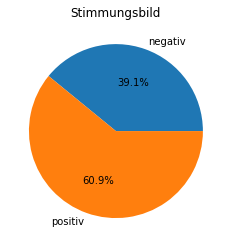

In [75]:
plt.pie([tweets['Label'][tweets['Label'] == 'negativ'].count(), tweets['Label'][tweets['Label'] == 'positiv'].count()], labels=labels, autopct='%1.1f%%')
plt.title('Stimmungsbild')
plt.show()

Nat√ºrlich werden nicht immer gleich viele W√∂rter pro Tweet im Vokabular gefunden. Da unser Modell eine konstante Eingabe ben√∂tigt, m√ºssen wir uns auf eine Wortzahl einigen, die vom Modell pro Tweet einbezogen wird. Naheliegend entscheiden wir uns f√ºr die im Mittel gefundenen W√∂rter als `pad_size`...

In [76]:
pad_size = int(np.round(np.mean([len(vector) for vector in tweets['Vector']])))
pad_size

2

...und f√ºllen fehlende Werte mit der `padding()` Funktion wie folgt auf.

In [77]:
def padding(tweet):
    """Pad vectors with zeros at the end."""
       
    return np.pad(tweet[:pad_size], (0, pad_size-len(tweet[:pad_size])))

#### 3.1.4 <a id='features'>Features</a>

In [78]:
def get_features(words):
    return dict([(word, True) for word in words])

In [79]:
negative_features = [(get_features(vocab.loc[vocab['Stimmung'] == 'negativ']['Wort']), 'negativ')]
positive_features = [(get_features(vocab.loc[vocab['Stimmung'] == 'positiv']['Wort']), 'positiv')]
train_set = negative_features + positive_features

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

#### 3.2.1 <a id='√ºberwachte-klassifikation'>√úberwachte Klassifizierung</a>

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus f√ºhren wir eine √ºberwachte Klassifizierung aus.

In [80]:
from nltk import NaiveBayesClassifier

In [81]:
classifier = NaiveBayesClassifier.train(train_set)

In [82]:
def supervised_classifier(tweets):
    """Supervised classifier"""
    
    print('#\tSoll\tIst\t‚àÜ\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        features = get_features(tweet.Token)
        prediction = classifier.classify(features)
            
        if label != prediction: 
            delta = 'X'
            error += 1
        else: 
            delta = ' '
        
        if prediction == 'negativ':
            negative += 1
            
        else:
            positive += 1
            
        print('%i\t%s\t%s\t%s\t%.140s' % (tweet.Index, label, prediction, delta, tweets_copy.iloc[tweet.Index].replace('\n', '')))
        
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=labels, autopct='%1.1f%%')
    plt.title('√úberwachte Klassifizierung')

In [97]:
supervised_classifier(tweets.sample(20))

#	Soll	Ist	‚àÜ	Tweet
4139	positiv	positiv	 	@gabygh13 Einfach ignorieren, da unma√ügeblich u. ich h√§tte auch starke Zweifel an seiner Bio. Pass auf dich auf, Gaby.
1480	positiv	positiv	 	Erst in einem Video zur Shoper√∂ffnung erkl√§rt Meritt, dass dies eine Bezeichnung der Communities ist, innerhalb derer diese hergestellt werd
4401	negativ	positiv	X	@berdiberdus @ZDFheute Ich denke er hat einfach einen genialen Plan, solange die Welt sich f√ºr dumm verkaufen l√§sst ist er auf der Siegerstr
4666	positiv	positiv	 	@mamigration EIN Buch gibt es so gar nicht.Ich bin ein riesiger Fan der Black Dagger Brotherhood von J.R.Ward, den dark Carpathians von Chri
4444	positiv	positiv	 	@welt a bankkaufm√§nnle und ex langzeitstudent (14jahre) und einer der es nur zum erste staatsexamen schaffte - top elite in unserem land!
1539	positiv	positiv	 	@anx__01 @kevstarstyle Nicht "wirklich" wirklich. Es gibt Nicht-Wei√üe die rassistisch sind, aber richtigen Rassismus gegen Wei√üe in ernst zu
4610	negati

#### 3.2.2 <a id='un√ºberwachte-klassifikation'>Un√ºberwachte Klassifizierung</a>

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering f√ºhren wir eine un√ºberwachte Klassifizierung aus.

In [84]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [85]:
clusterer = KMeansClusterer(2, euclidean_distance, repeats=10, avoid_empty_clusters=True)

In [86]:
clusters = clusterer.cluster(tweets['Vector'].apply(padding), True)

Wo liegen die Mittelpunkte unserer Cluster?

In [87]:
def plot_clusters():
    """Plot clusters"""
    
    means = clusterer.means()
    plt.scatter(means[0], means[0])
    plt.scatter(means[1], means[1])
    plt.legend(['Negativ', 'Positiv'])

In [88]:
plot_clusters()

In [89]:
def unsupervised_classifier(tweets):
    """Unsupervised classifier"""
    
    print('#\tSoll\tIst\t‚àÜ\tTweet')
    
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        vector = padding(tweet.Vector)
        prediction = clusterer.classify(vector)
        
        if prediction == 0: 
            cluster = 'negativ'
            negative += 1
            
        else:
            cluster = 'positiv'
            positive += 1
            
        if label != cluster: 
            delta = 'X'
            error += 1
            
        else: delta = ' '
            
        print('%i\t%s\t%s\t%s\t%.140s' % (tweet.Index, label, cluster, delta, tweets_copy.iloc[tweet.Index].replace('\n', '')))
   
    print('\nGenauigkeit:', 1 - error / tweets.shape[0])
    plt.pie([negative, positive], labels=['negativ', 'positiv'], autopct='%1.1f%%')
    plt.title('Un√ºberwachte Klassifizierung')

In [100]:
unsupervised_classifier(tweets.sample(20))

#	Soll	Ist	‚àÜ	Tweet
1813	positiv	negativ	X	@retardcapsuless Wie sch√∂n kann ein Mensch aussehen omg
2635	positiv	positiv	 	@laenguyn Ouip danke sch√∂n belgo
4715	negativ	negativ	 	@bigben82 @Kizito5 Wenn dem so w√§re, w√§re meine Mutti begabter als all die Vollpfosten, die ihr zu sch√ºtzen versucht. ;) Dummes Papavolk, da
2161	positiv	positiv	 	@ridingwith11 Ich danke dir von ganzem Herzen und w√ºnsche dir und deiner Familie alles Liebe ‚öòüôè‚öòViele liebe Gr√º√üe Emma ‚öò https://t.co/oa39Nl
4704	positiv	negativ	X	@user82de @ClemensAugust2 @Bartzissey @waldenmonk N√∂. Das ist nicht die "richtige Grundannahme"  zu Corona, sondern der Effekt / die Auswirk
1200	negativ	negativ	 	@Zora_211212 A) Ein infizierter ohne Maske husted Dich an - &gt; V√∂llig egal ob Du eine Maske tr√§gst oder nicht. Hohes Infektionsrisiko.B) I
2323	negativ	positiv	X	@IngeHannemann @hubertus_heil Es ist im Prinzip e.neoliberaler Kreislauf im Sinne weiterer #Deklassierung einer #Menschengruppe innerhalb un
996	

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

In [91]:
negative = "Was f√ºr ein schlechtes Lernmodul"
positive = "Was f√ºr ein gutes Lernmodul"

In [92]:
def unsupervised_classification(sentence):
    """Helper function for unsupervised classification"""
    
    vector = padding(vectorize(sentence))
    prediction = clusterer.classify(vector)
    
    if prediction == 0: print('negativ')            
    else: print('positiv')

### 4.1 √úberwachter Klassifikator

Welche Stimmung gibt er f√ºr folgenden Satz aus?

> Was f√ºr ein schlechtes Lernmodul

In [93]:
classifier.classify(get_features(negative.split()))

'negativ'

Welche Stimmung gibt er f√ºr folgenden Satz aus?

> Was f√ºr ein gutes Lernmodul

In [94]:
classifier.classify(get_features(positive.split()))

'positiv'

### 4.2 Un√ºberwachter Klassifikator

Welche Stimmung gibt er f√ºr folgenden Satz aus?

> Was f√ºr ein schlechtes Lernmodul

In [95]:
unsupervised_classification(negative.split())

negativ


Welche Stimmung gibt er f√ºr folgenden Satz aus?

> Was f√ºr ein gutes Lernmodul

In [96]:
unsupervised_classification(positive.split())

positiv


<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>

**Anhang:**

![Pipeline](./img/pipeline.png)

**Weiterf√ºhrendes:**

2. Daten
3. Modell
    1. Daten einbetten
        * [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)
4. Verwendung